In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

sex
0    312
1    713
Name: sex, dtype: int64


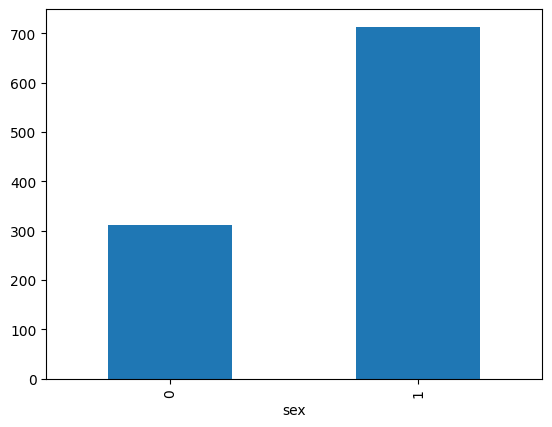

In [5]:
## visiualizing based on CLass and age

print(df.groupby(['sex'])['sex'].count())
df.groupby(['sex'])['sex'].count().plot(kind="bar")
plt.show()

In [6]:
## visiualizing based on CLass and age

print(df.groupby(['age'])['age'].count())


age
29     4
34     6
35    15
37     6
38    12
39    14
40    11
41    32
42    26
43    26
44    36
45    25
46    23
47    18
48    23
49    17
50    21
51    39
52    43
53    26
54    53
55    30
56    39
57    57
58    68
59    46
60    37
61    31
62    37
63    32
64    34
65    27
66    25
67    31
68    12
69     9
70    14
71    11
74     3
76     3
77     3
Name: age, dtype: int64


In [7]:
df.shape


(1025, 14)

In [8]:
from ydata_profiling import ProfileReport
report=ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
## for male 
male=len(df[df['sex']==0])

In [10]:
male

312

In [11]:
## for female 
female=len(df[df['sex']==1])

In [12]:
female 

713

## splitting the dataset into test and train dataset

In [13]:
X=df.drop('target',axis=1)
y=df['target']

In [14]:
## let's split the dataframe for training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu


In [16]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['No-heart disease','heart disease']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

## the following model is used for the project 
1. KNN
2. SVC
3. logisitic regression
4. gaussian NB. 

In [17]:
## lt's import the models we want to use in our data, train the model to make predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [18]:
#instanciation
SVC_model=SVC()
#KNN-model requires you to specify n_neighbors,
# the numbers of points the classifier will look at to determine what class a new point blongs to
#KN_model=KNeighborsclassifier(n_neigbors=5)by default,n-neighbors is 5, so we leave at that first
KNN_model=KNeighborsClassifier()
Logistic_model = LogisticRegression()  # Logistic Regression model
GaussianNB_model = GaussianNB()  # Gaussian Naive Bayes model


In [19]:
# now let's fit the classifiers:
# Now train the model using the fit method. in the fit method, pass training datasets in it .
# x_train and y_train are training datasets

svm=SVC_model.fit(X_train,y_train)
knn=KNN_model.fit(X_train,y_train)
logistic = Logistic_model.fit(X_train, y_train)
gnb = GaussianNB_model.fit(X_train, y_train)


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
SVC_pred=svm.predict(X_test)
KNN_pred=KNN_model.predict(X_test)
Logistic_pred = logistic.predict(X_test)
GNB_pred = gnb.predict(X_test)

In [21]:
print('SVC_pred')
print(SVC_pred)
print('=================================')
print()

print('KNN prediction')
print(KNN_pred)
print('=================================')
print()

print('Logistic Regression Predictions:')
print(Logistic_pred)
print('=================================')
print()

print('Gaussian Naive Bayes Predictions:')
print ('=================================')
print(GNB_pred)



SVC_pred
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1]

KNN prediction
[1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]

Logistic Regression Predictions:
[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1

In [22]:
# accuracy score is the simplest way to evaluate the classification performance

from sklearn.metrics import accuracy_score
print(f'SVC Accuracy score:{round(accuracy_score(SVC_pred,y_test),2)}')
print(f'KNN Accuracy score:{round(accuracy_score(KNN_pred,y_test),2)}')
print(f'Logistic Regression Accuracy Score: {round(accuracy_score(Logistic_pred, y_test), 2)}')
print(f'Gaussian Naive Bayes Accuracy Score: {round(accuracy_score(GNB_pred, y_test), 2)}')

SVC Accuracy score:0.68
KNN Accuracy score:0.73
Logistic Regression Accuracy Score: 0.79
Gaussian Naive Bayes Accuracy Score: 0.8


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [24]:
print(confusion_matrix(SVC_pred,y_test))
print()
print(confusion_matrix(KNN_pred,y_test))
print()
print(confusion_matrix(Logistic_pred,y_test))
print()

print(confusion_matrix(GNB_pred,y_test))
print()


[[62 25]
 [40 78]]

[[74 27]
 [28 76]]

[[71 13]
 [31 90]]

[[72 11]
 [30 92]]



## SVM (SUPPORT VECTOR MACHINE)



Confusion Matrix:
[[62 40]
 [25 78]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



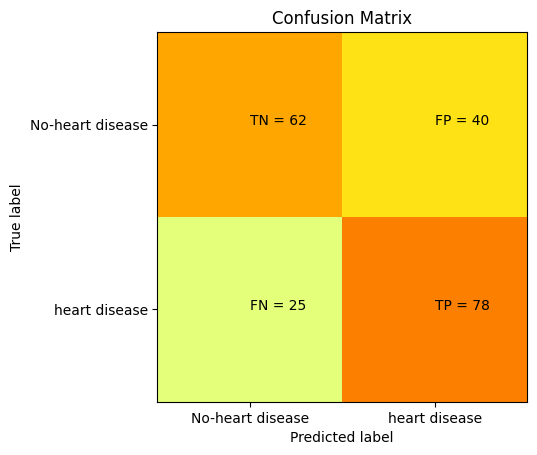

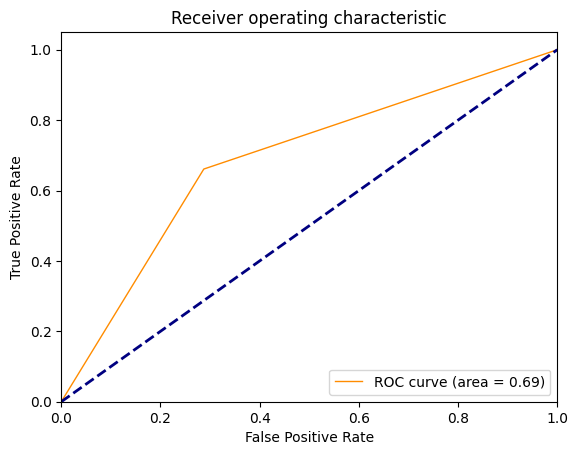

In [25]:
svm = SVC()
svm.fit(X_train, y_train)
report_performance(svm) 
roc_curves(svm)

## KNN



Confusion Matrix:
[[74 28]
 [27 76]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



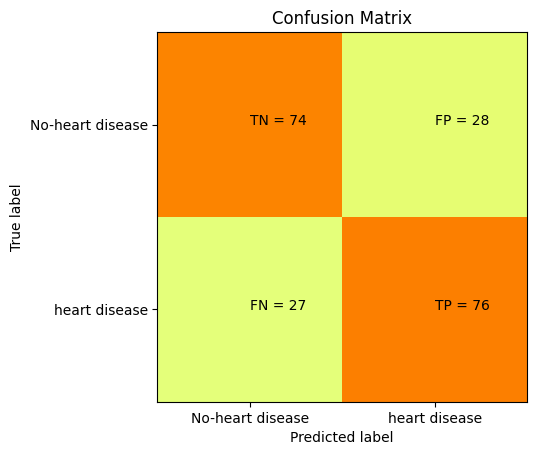

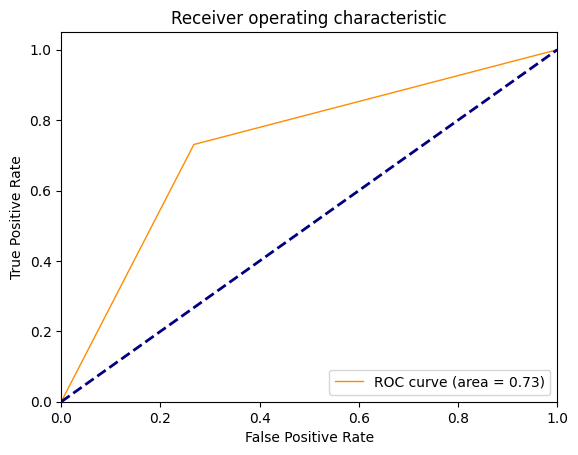

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
report_performance(knn) 
roc_curves(knn)

## LOGISITC REGRESSION 

C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[71 31]
 [13 90]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



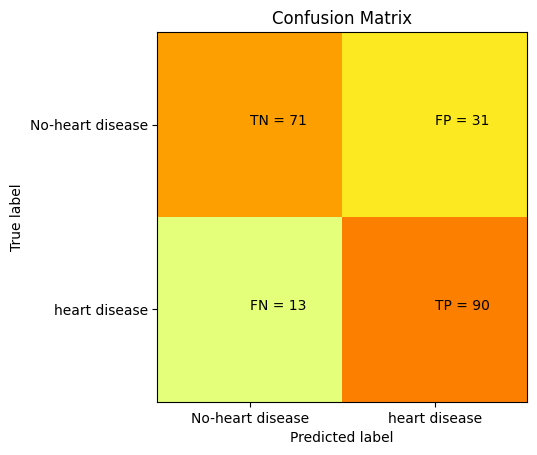

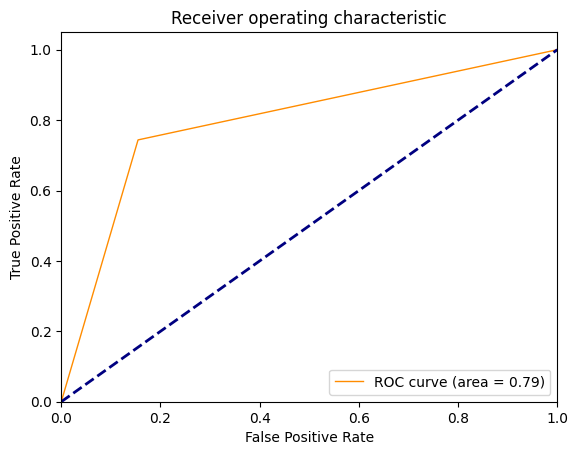

In [27]:
log =LogisticRegression()
log.fit(X_train, y_train)
report_performance(log) 
roc_curves(log)

## GaussianNB model



Confusion Matrix:
[[72 30]
 [11 92]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



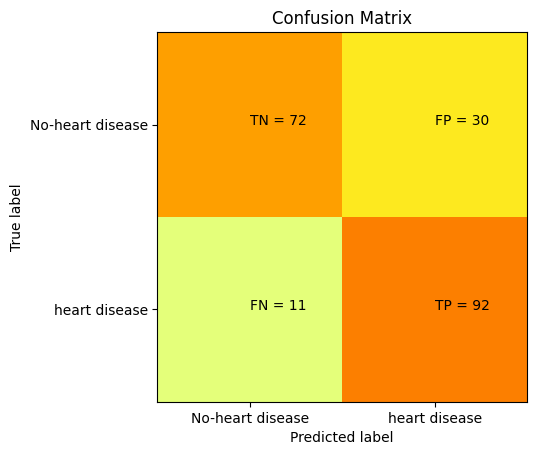

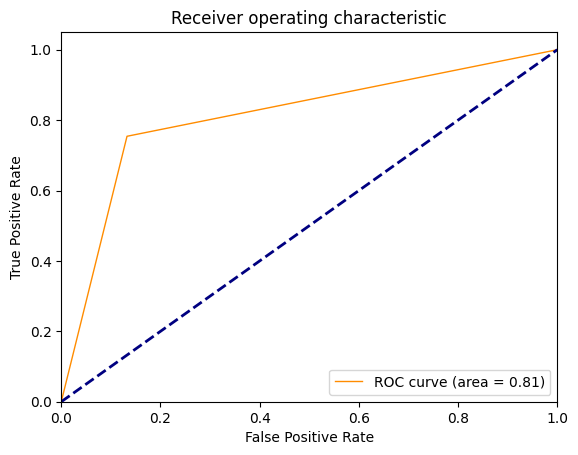

In [28]:
GNB =GaussianNB()
GNB.fit(X_train, y_train)
report_performance(GNB) 
roc_curves(GNB)


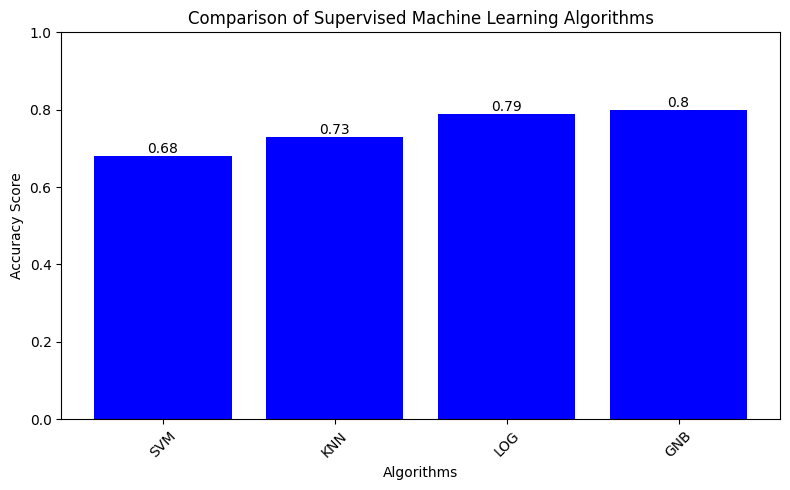

In [29]:
 # Sample data for algorithm performance comparison
algorithms = ['SVM', 'KNN', 'LOG', 'GNB']
accuracy_scores = [0.68, 0.73, 0.79, 0.80]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Supervised Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()

## gradient boosting 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_train_gbc=gbc.predict(X_train)
train_accuracy_gbc=accuracy_score(y_train,y_pred_train_gbc)
y_pred_gbc=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_gbc)
print(' accuracy of gradient boosting',accuracy)
print('==================================================')

 accuracy of gradient boosting 0.9317073170731708




Confusion Matrix:
[[93  9]
 [ 5 98]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



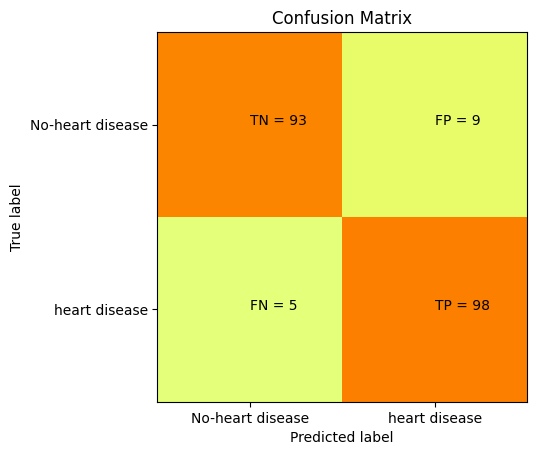

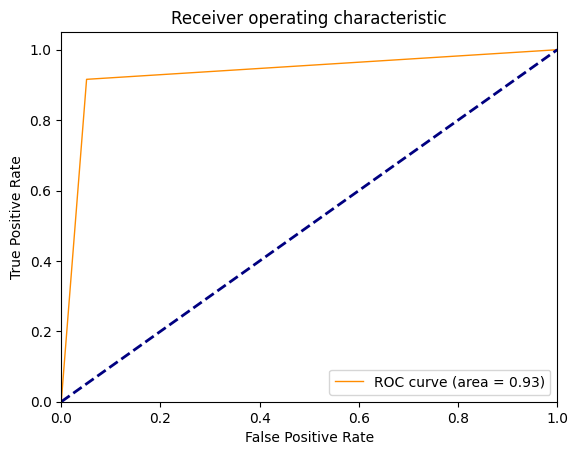

In [32]:
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)
report_performance(gbc)
roc_curves(gbc)

## bagging classifier 

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bc= BaggingClassifier()
bc.fit(X_train,y_train)
y_pred_train_bc=bc.predict(X_train)
train_accuracy_bc=accuracy_score(y_train,y_pred_train_bc)
y_pred_bc=bc.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred_bc)
print('accuracy of bagging',accuracy1)
print('==================================================')

accuracy of bagging 0.9853658536585366




Confusion Matrix:
[[102   0]
 [  3 100]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



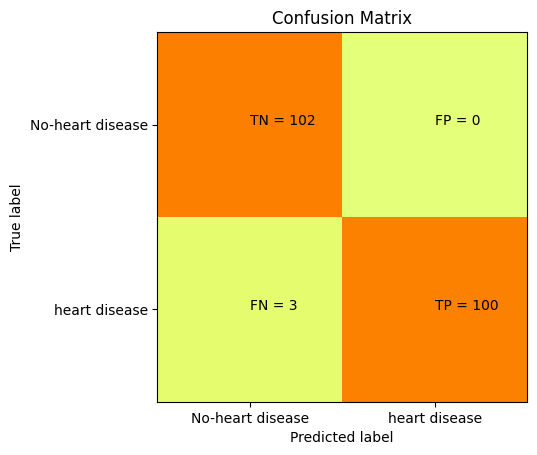

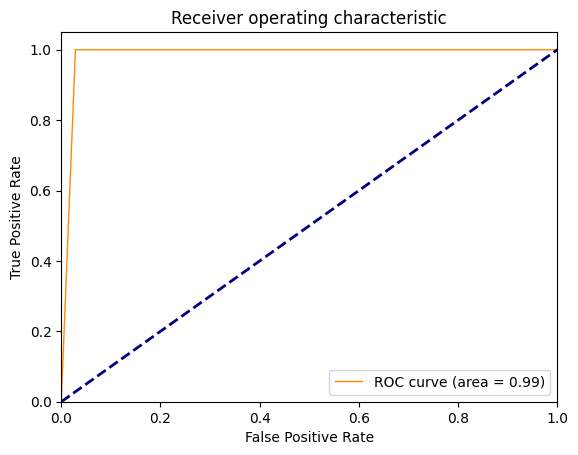

In [35]:
bc.fit(X_train,y_train)
pred_bc=bc.predict(X_test)
report_performance(bc)
roc_curves(bc)

## stacking classifier 

In [36]:
from sklearn.metrics import roc_auc_score as roc 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

# Create individual classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

# Create the stacking classifier with a list of classifiers and a meta-classifier
stacking_clf = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=clf2)

In [37]:
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[RandomForestClassifier(), LogisticRegression()],
                   meta_classifier=LogisticRegression())

In [38]:
# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test)


In [39]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9853658536585366


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[102   0]
 [  3 100]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



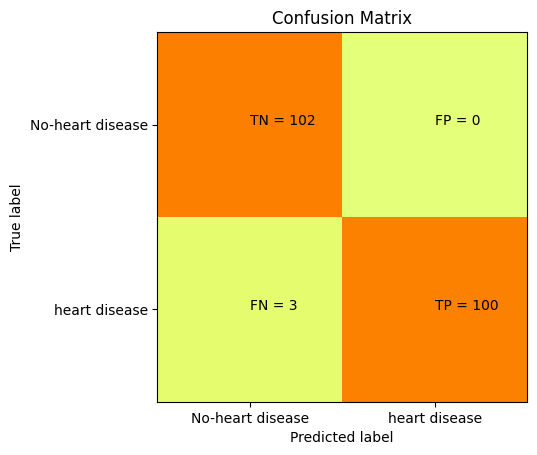

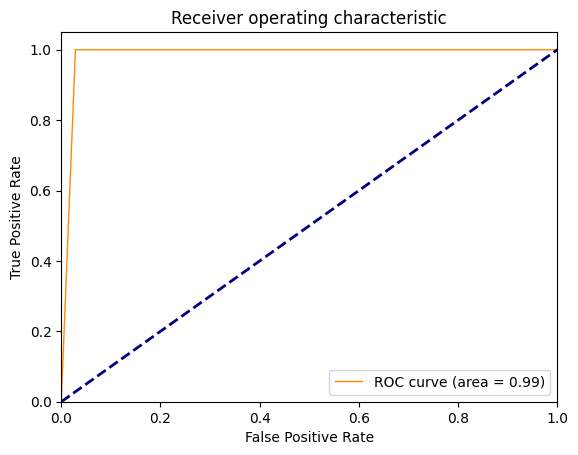

In [40]:
stacking_clf.fit(X_train,y_train)
pred_stc=stacking_clf.predict(X_test)
report_performance(stacking_clf)
roc_curves(stacking_clf)

## Voting classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
# Create the Voting Classifier with a list of base classifiers and the voting method
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2)], voting='hard')

In [43]:
# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())])

In [44]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[102   0]
 [ 16  87]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       102
           1       1.00      0.84      0.92       103

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



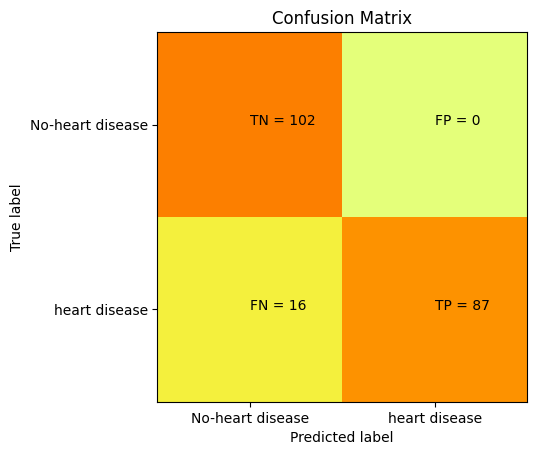

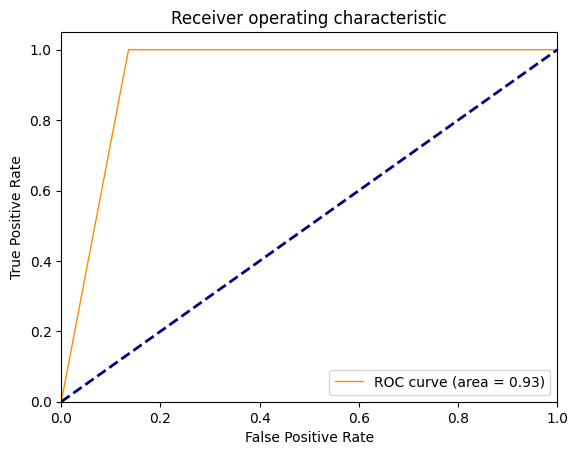

In [45]:
voting_clf.fit(X_train,y_train)
pred_vtc=voting_clf.predict(X_test)
report_performance(voting_clf)
roc_curves(voting_clf)

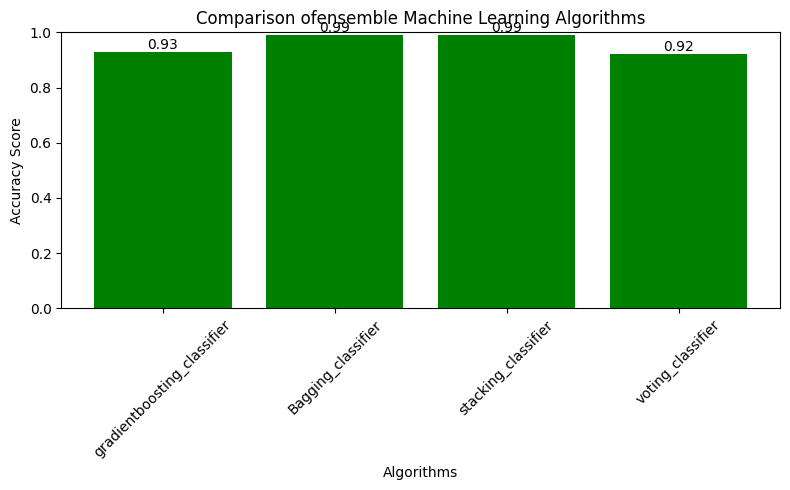

In [46]:
 # Sample data for algorithm performance comparison
algorithms = ['gradientboosting_classifier', 'Bagging_classifier', 'stacking_classifier', 'voting_classifier']
accuracy_scores = [0.93, 0.99, 0.99, 0.92]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison ofensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()

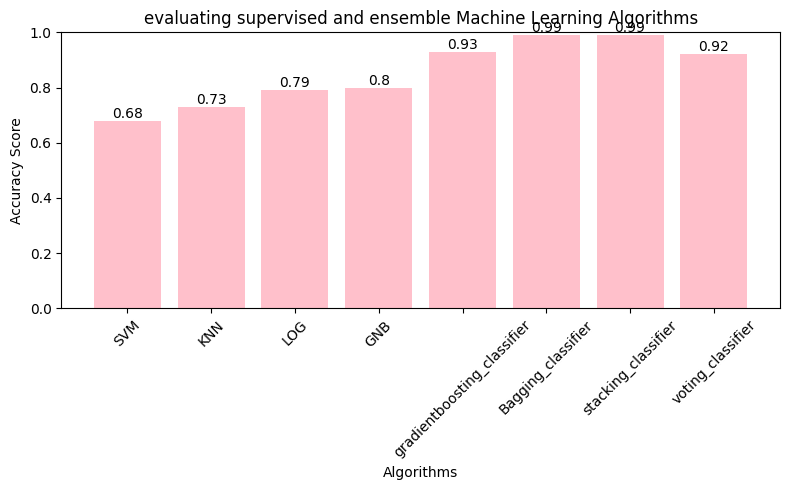

In [47]:
 # Sample data for algorithm performance comparison
algorithms = ['SVM', 'KNN', 'LOG', 'GNB','gradientboosting_classifier', 'Bagging_classifier', 'stacking_classifier', 'voting_classifier']
accuracy_scores = [0.68, 0.73, 0.79, 0.80,0.93, 0.99, 0.99, 0.92]

# Plotting the comparison
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy_scores, color='pink')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('evaluating supervised and ensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()